In [46]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score #métrica de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
import warnings #remoção de avisos

Baixando o dataset

In [47]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

# Listar os arquivos dentro do diretório do dataset
print("\nFiles in the dataset directory:")
for file_name in os.listdir(path):
    print(file_name)
print("Path to dataset files:", path)


Files in the dataset directory:
data.csv
Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [48]:
import pandas as pd


Conhecendo a estrutura dos dados, podemos ver que há variáveis categóricas e escalas de valores totalmente diferentes entre si

In [49]:
dados = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
dados.head(20)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


Como podemos ver a tabela ID tem relação onde os dados foram extraidos e não são necessários para nossa análise, então o correto é removê-lo

In [50]:
dados=dados.drop('id',axis=1)
dados.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


Agora vamos investigar os valores max, min e media de cada tabela de dados

In [51]:
dados.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [52]:
dados.shape

(569, 32)

O dataset tem 569 linhas e 32 colunas

In [53]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Podemos ver que nossa variavel categorica é nossa target e todas as colunas tem o msm formato e com msm numero de linhas, podemos ver com análise que há uma coluna que não há informações, e parece n ter relações com nosso dataset, necessitando a remoção

In [54]:
dados=dados.drop('Unnamed: 32',axis=1)
dados.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dados['diagnosis']=encoder.fit_transform(dados['diagnosis'])

Aqui necessário Usar labelEnconder para transformar nossa variável target que é do tipo categórica em um número entre 1 e 0

In [56]:
nontarget = dados.drop('diagnosis', axis=1) # nontarget AINDA É UM DATAFRAME AQUI
features = nontarget.columns.tolist() # Obtém os nomes das features
X = nontarget[features] # X agora é um DataFrame com as colunas corretas
# y pode continuar sendo um array NumPy, pois o SHAP não precisa dos nomes das colunas de y
y = dados['diagnosis'].values

# --- Verificação (opcional, mas recomendado para confirmar) ---
print(f"Tipo de X após a definição: {type(X)}")
print(f"Shape de X: {X.shape}")
print(f"Colunas de X: {X.columns.tolist()}")
print(f"Tipo de y após a definição: {type(y)}")
print(f"Shape de y: {y.shape}")

Tipo de X após a definição: <class 'pandas.core.frame.DataFrame'>
Shape de X: (569, 30)
Colunas de X: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
Tipo de y após a definição: <class 'numpy.ndarray'>
Shape de y: (569,)


Após, colocamos os valores na variável X e y para criar a matriz de correlação

In [57]:


# Calcula a matriz de correlação
correlation_matrix = nontarget.corr()
correlation_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


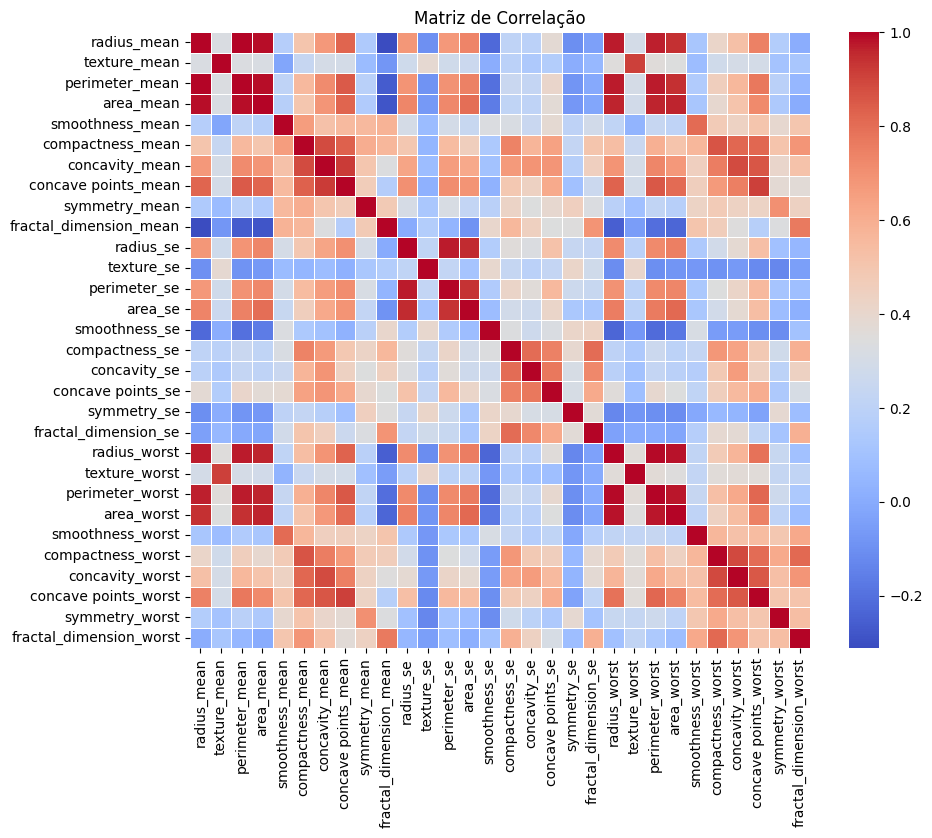

In [58]:
import seaborn as sns
# Visualização da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()

In [59]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_padronizado = pd.DataFrame(imputer.fit_transform(nontarget), columns=features)
display(X_padronizado.head())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Shape de X_padronizado (antes do scaler): (569, 30)
Shape de X_scaler (APÓS o scaler, ANTES do PCA.fit): (569, 30)
Shape de pca.components_ (APÓS o pca.fit): (30, 30)


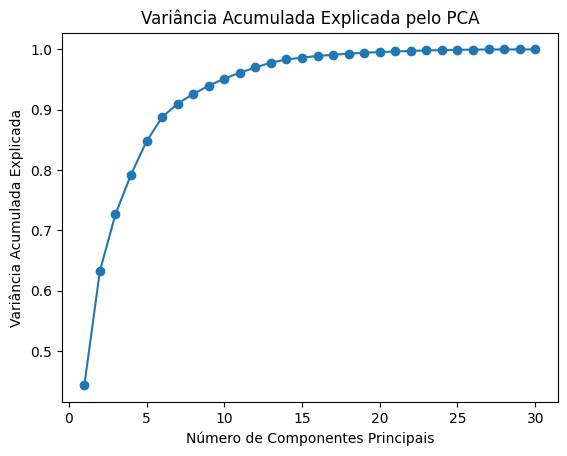

In [60]:
from sklearn.decomposition import PCA
# Padroniza as variáveis
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_padronizado)
# Calcula a variância explicada acumulada
pca = PCA()
pca.fit(X_scaler)

# --- NOVO DIAGNÓSTICO AQUI ---
print(f"Shape de X_padronizado (antes do scaler): {X_padronizado.shape}")
print(f"Shape de X_scaler (APÓS o scaler, ANTES do PCA.fit): {X_scaler.shape}")
# Verifique o shape do components_ logo após o fit
print(f"Shape de pca.components_ (APÓS o pca.fit): {pca.components_.shape}")

variancia_cumulativa = np.cumsum(pca.explained_variance_ratio_)
# Visualização da variância explicada acumulada
plt.plot(range(1, len(variancia_cumulativa) + 1), variancia_cumulativa, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Acumulada Explicada')
plt.title('Variância Acumulada Explicada pelo PCA')
plt.show()



nessa etapa vemos o gráfico apara entendermos o melhor número de componentes para limitar a quantidade de colunas visando a melhor variância de nossa base

In [61]:

# Vamos definir um limiar de 90%, ou seja, queremos obter uma porcentagem de explicancia sobre
# nossos dados de igual a 90%
limiar_de_variancia = 0.90

# Encontrar o número de componentes necessários para atingir ou ultrapassar o limiar
num_de_pca = np.argmax(variancia_cumulativa >= limiar_de_variancia) + 1

print(f"Número de Componentes para {limiar_de_variancia * 100}% da Variância: {num_de_pca}")


Número de Componentes para 90.0% da Variância: 7


Para limiar em 95% podemos ver que precisaremos de 7 colunas

In [62]:

# Inicializa o objeto PCA
pca = PCA(n_components=num_de_pca)
# Aplica o PCA aos dados padronizados
X_pca = pca.fit_transform(X_scaler)
print(f"Shape de pca.components_ (APÓS o pca.fit): {pca.components_.shape}")


Shape de pca.components_ (APÓS o pca.fit): (7, 30)


Exibindo a proporção entre as colunas principais e a variância explicada

In [63]:

# Exibe a proporção de variância explicada
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]


In [64]:
# Pegando o número de componentes principais gerados
num_components = X_pca.shape[1]
# Gerando uma lista para cada PCA
column_names = [f'PC{i}' for i in range(1, num_components + 1)]
# Criando um novo dataframe para visualizarmos como ficou nossos dados reduzidos com o PCA
pca_df = pd.DataFrame(data=X_pca, columns=column_names)
pca_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,9.192837,1.948583,-1.123166,-3.633731,1.195110,1.411424,2.159370
1,2.387802,-3.768172,-0.529293,-1.118264,-0.621775,0.028656,0.013358
2,5.733896,-1.075174,-0.551748,-0.912083,0.177086,0.541452,-0.668166
3,7.122953,10.275589,-3.232790,-0.152547,2.960878,3.053422,1.429911
4,3.935302,-1.948072,1.389767,-2.940639,-0.546747,-1.226495,-0.936213
...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,-1.177314,0.074824,-2.375193,-0.596130
565,3.793382,-3.584048,2.088476,2.506028,0.510723,-0.246710,-0.716326
566,1.256179,-1.902297,0.562731,2.089227,-1.809991,-0.534447,-0.192758
567,10.374794,1.672010,-1.877029,2.356031,0.033742,0.567936,0.223082


Abaixo criaremos um historigram para analisar a distribuição dos dados de cada coluna PC

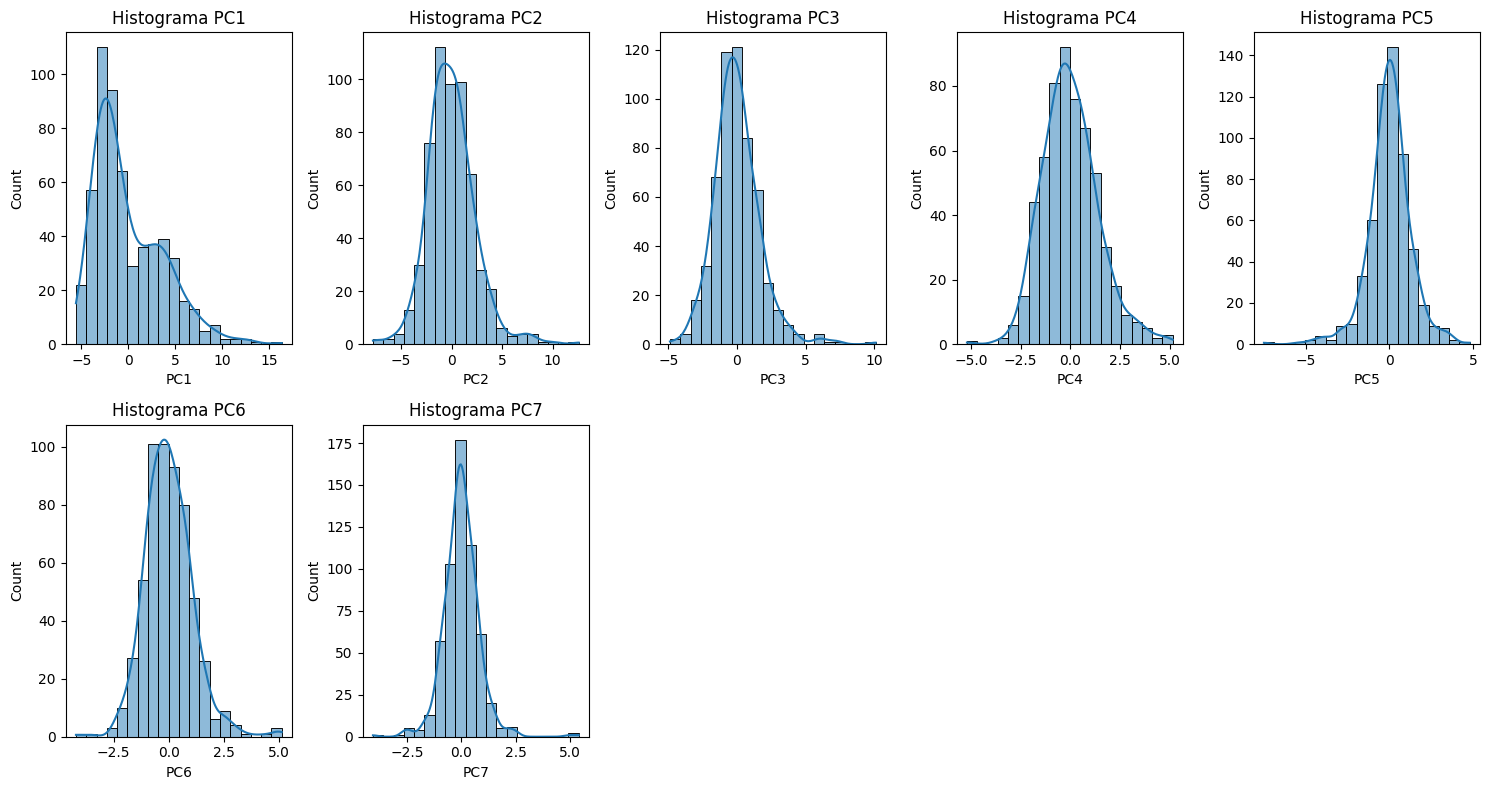

In [65]:

# Criar histogramas para cada coluna
plt.figure(figsize=(15, 8))
for i, col in enumerate(pca_df.columns[:10]):
    plt.subplot(2, 5, i + 1)  # Aqui, ajustei para 2 linhas e 5 colunas
    sns.histplot(pca_df[col], bins=20, kde=True)
    plt.title(f'Histograma {col}')
plt.tight_layout()
plt.show()

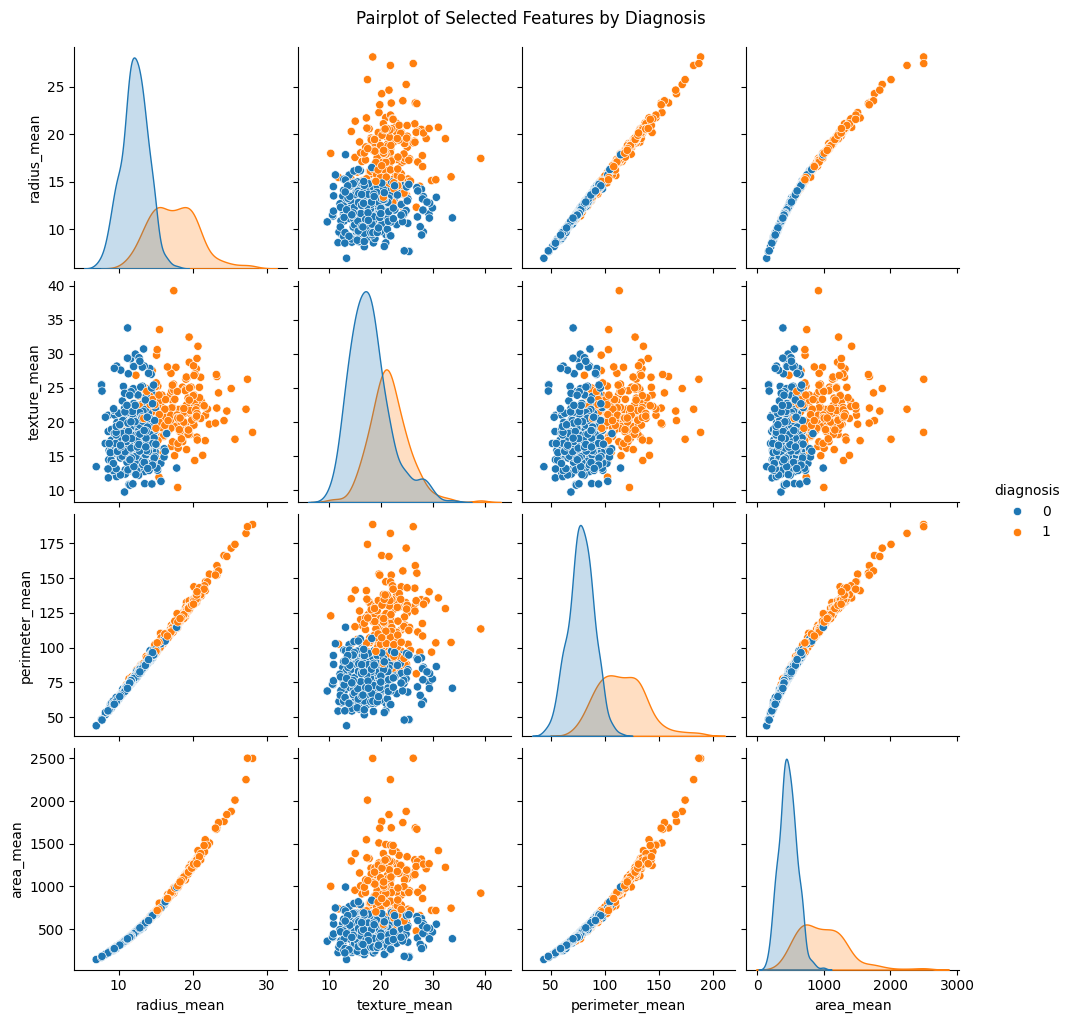

In [66]:
features_for_pairplot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(dados[features_for_pairplot], hue='diagnosis', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features by Diagnosis', y=1.02)
plt.show()

Podemos ver no gráfico que a distribuição dos dados não é normal, mas representam perfeitamente a estrutura do mundo real

In [67]:

from scipy.stats import shapiro
# Vamos olhar para cada coluna a normalidade após a redução de dimensionalidade
for column in pca_df.columns:
    stat, p_value = shapiro(pca_df[column])
    print(f'Variável: {column}, Estatística de teste: {stat}, Valor p: {p_value}')

    # Você pode então interpretar o valor p para determinar se a variável segue uma distribuição normal
    if p_value > 0.05:
        print(f'A variável {column} parece seguir uma distribuição normal.\n')
    else:
        print(f'A variável {column} não parece seguir uma distribuição normal.\n')

Variável: PC1, Estatística de teste: 0.9139439437830323, Valor p: 1.8987540424390222e-17
A variável PC1 não parece seguir uma distribuição normal.

Variável: PC2, Estatística de teste: 0.9593928650814297, Valor p: 2.0128944633202058e-11
A variável PC2 não parece seguir uma distribuição normal.

Variável: PC3, Estatística de teste: 0.9506966332294975, Valor p: 7.620093055934491e-13
A variável PC3 não parece seguir uma distribuição normal.

Variável: PC4, Estatística de teste: 0.9829874989144588, Valor p: 3.4025480513643e-06
A variável PC4 não parece seguir uma distribuição normal.

Variável: PC5, Estatística de teste: 0.9514758257465233, Valor p: 1.0051271030590186e-12
A variável PC5 não parece seguir uma distribuição normal.

Variável: PC6, Estatística de teste: 0.965790405136138, Valor p: 3.0344243865015937e-10
A variável PC6 não parece seguir uma distribuição normal.

Variável: PC7, Estatística de teste: 0.9342948702495742, Valor p: 4.030210113902499e-15
A variável PC7 não parece seg

Confirmamos nossa analise usando shapiro e mostrando o valor de p que está muito baixo, mostrando que nossa variação de dados nas variáveis não tem distribuição normal

In [68]:
pip install catboost

In [69]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.svm import SVC # Support Vector Classifier (SVC)
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier (KNNC)
from sklearn.naive_bayes import GaussianNB # Naive Bayes Classifier
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boosting Machine (GBM)
from xgboost import XGBClassifier # XGBoost (Extreme Gradient Boosting)
from lightgbm import LGBMClassifier # LightGBM
from catboost import CatBoostClassifier # CatBoost
from sklearn.model_selection import cross_val_score


import warnings
warnings.simplefilter('ignore')

Agora precisamos treinar nosso modelo com as colunas PC

In [70]:
pca_feature_names = [f'PC{i+1}' for i in range(num_de_pca)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_feature_names)
X_train, X_test, y_train, y_test = train_test_split(X_pca_df,y,test_size=0.2,random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Columns of X_train: {X_train.columns.tolist()}")
print(f"Columns of X_test: {X_test.columns.tolist()}")

# Assert that column names and order are identical
pd.testing.assert_index_equal(X_train.columns, X_test.columns)


Shape of X_train: (455, 7)
Shape of X_test: (114, 7)
Columns of X_train: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
Columns of X_test: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']


Usaremos standardScaler para transformar os dados de treinamento e teste da coluna X em formato padronizado.

In [71]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


In [72]:
models = {
    'LogisticRegression':LogisticRegression(),
    'DTC':DecisionTreeClassifier(),
    'SVC':SVC(probability=True),
    'KNN':KNeighborsClassifier(),
    'Naive Bayes':GaussianNB(),
    'GBM':GradientBoostingClassifier(),
    'XGBoost':XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'lightgbm':LGBMClassifier(force_col_wise=True,verbose=-1),
    'catboost':CatBoostClassifier(verbose=0)
}

Aqui, após criar um array de models, nós criaremos métricas para visualizar a performance de cada modelo

In [73]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# --- Assuming the following variables are already defined and correct: ---
# models (e.g., {'LogisticRegression': LogisticRegression(), ...})
# X_train_scaler (standardized training features)
# y_train (training labels)
# X_test_scaler (standardized test features)
# y_test (test labels)
# X (original, unscaled full feature set for cross_val_score within Pipeline)
# y (original full label set for cross_val_score within Pipeline)
# -------------------------------------------------------------------------

results = [] # Lista para armazenar os resultados

for name, model in models.items():
    print(f"\n--- Avaliando o modelo: {name} ---")

    # Fitting model with training data (USANDO DADOS PADRONIZADOS)
    model.fit(X_train_scaler, y_train)
    print(f"{name} treinado!")

    # Predições no conjunto de teste (USANDO DADOS PADRONIZADOS)
    y_pred = model.predict(X_test_scaler)

    # Cálculo da Acurácia no conjunto de teste
    y_acc = accuracy_score(y_test, y_pred) # Corrected order: y_true, y_pred
    print(f'Acurácia no teste: {y_acc:.4f}')
    print("--"*30)

    # Cross-Validation using Pipeline (Recommended for consistency)
    pipeline = Pipeline([
        ('scaler', StandardScaler()), # Ensure scaler is applied in CV
        ('model', model) # The model will be cloned and trained inside the pipeline
    ])
    # Note: X and y passed here should be the ORIGINAL, UNSEALED data
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    print("Scores de Cross-validation (Acurácia com Pipeline):", scores)
    print(f"Acurácia média de Cross-validation (com Pipeline): {scores.mean():.4f}")
    print("--"*30)

    # Cálculo das outras métricas no conjunto de teste
    y_precision = precision_score(y_test, y_pred, average='weighted')
    y_recall = recall_score(y_test, y_pred, average='weighted')
    y_f1 = f1_score(y_test, y_pred, average='weighted')

    # --- NOVIDADE: CLASSIFICATION REPORT ---
    print("\nClassification Report (Conjunto de Teste):")
    # Assuming class_labels are defined, otherwise it will show 0, 1
    # If your classes are 0: Benign, 1: Malignant:
    target_names = ['Benigno', 'Maligno']
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("--"*30)

    # Collect results
    results.append({
        'Model': name,
        'Test Accuracy': y_acc,
        'Test Precision': y_precision,
        'Test Recall': y_recall,
        'Test F1-score': y_f1,
        'CV Mean Accuracy': scores.mean(),
        'Model_Object': model # We keep the trained model object
    })

print("\n--- Resultados Finais (Tabela de Métricas) ---")
results_df = pd.DataFrame(results)
# Drop Model_Object for display if it's not meant to be printed directly
print(results_df.drop(columns=['Model_Object']))


--- Avaliando o modelo: LogisticRegression ---
LogisticRegression treinado!
Acurácia no teste: 0.9737
------------------------------------------------------------
Scores de Cross-validation (Acurácia com Pipeline): [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Acurácia média de Cross-validation (com Pipeline): 0.9807
------------------------------------------------------------

Classification Report (Conjunto de Teste):
              precision    recall  f1-score   support

     Benigno       0.97      0.99      0.98        71
     Maligno       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

------------------------------------------------------------

--- Avaliando o modelo: DTC ---
DTC treinado!
Acurácia no teste: 0.9474
------------------------------------------------------------
Scores de Cross-validation (Acurácia com P

Nessa etapa o codigo escolhe o melhor modelo para análisarmos

In [74]:
# Escolhendo o melhor modelo
# Ordenar por F1-score decrescente e, em caso de empate, por CV Mean Accuracy decrescente
results_df = pd.DataFrame(results)
best_model_row = results_df.sort_values(by=['Test F1-score', 'CV Mean Accuracy'], ascending=[False, False]).iloc[0]
print(best_model_row)
best_model_name = best_model_row['Model']
best_model_object = best_model_row['Model_Object'] # Recupera o objeto do modelo treinado

print(f"\n--- O Melhor Modelo Escolhido para Análise SHAP é: {best_model_name} ---")
print(f"Com Test F1-score: {best_model_row['Test F1-score']:.4f}")
print(f"E CV Mean Accuracy: {best_model_row['CV Mean Accuracy']:.4f}")

Model                 LogisticRegression
Test Accuracy                   0.973684
Test Precision                  0.973719
Test Recall                     0.973684
Test F1-score                   0.973621
CV Mean Accuracy                0.980686
Model_Object        LogisticRegression()
Name: 0, dtype: object

--- O Melhor Modelo Escolhido para Análise SHAP é: LogisticRegression ---
Com Test F1-score: 0.9736
E CV Mean Accuracy: 0.9807


Agora criaremos uma parte para a análise shape para entendermos como nosso modelo conseguiu chegar no resultado


--- Iniciando a interpretação SHAP para o modelo: LogisticRegression ---

Calculando os valores SHAP para o conjunto de teste (isso pode levar tempo)...


  0%|          | 0/114 [00:00<?, ?it/s]

Valores SHAP calculados.

Gerando gráficos SHAP para insights do modelo...

############################################################
##             Análise SHAP para a Classe: Benigno             ##
############################################################

Exibindo o Gráfico de Resumo (Summary Plot) - Importância Global das Features para Benigno...


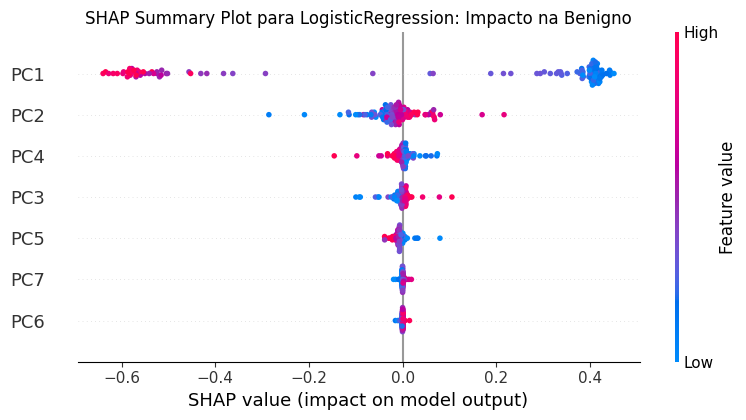


Exibindo o Gráfico de Dependência para a feature mais importante 'PC1' (Classe: Benigno)...


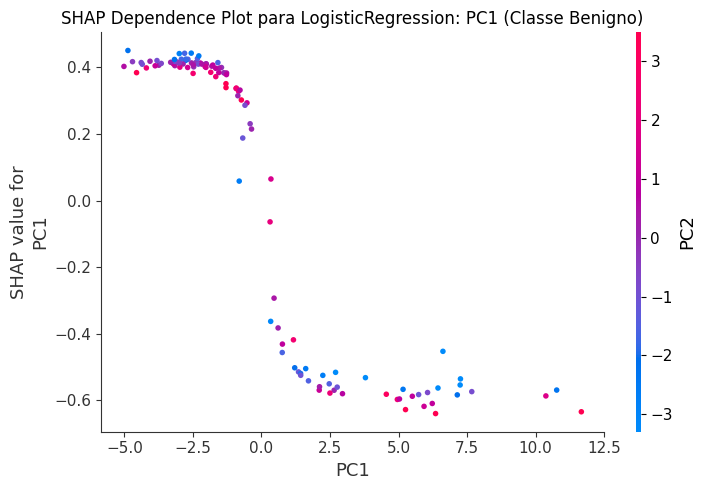


Exibindo o Gráfico de Força para a instância de teste 0 (Classe: Benigno)...


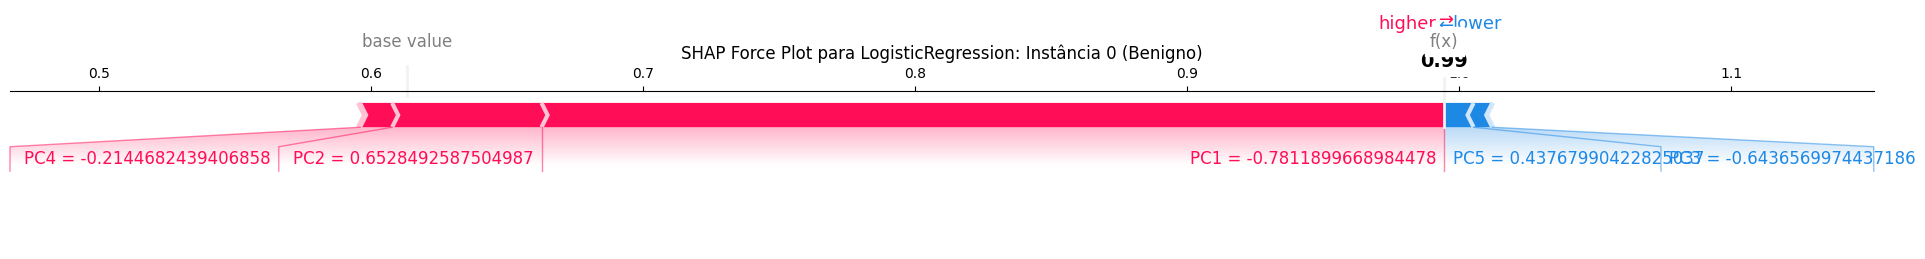


############################################################
##             Análise SHAP para a Classe: Maligno             ##
############################################################

Exibindo o Gráfico de Resumo (Summary Plot) - Importância Global das Features para Maligno...


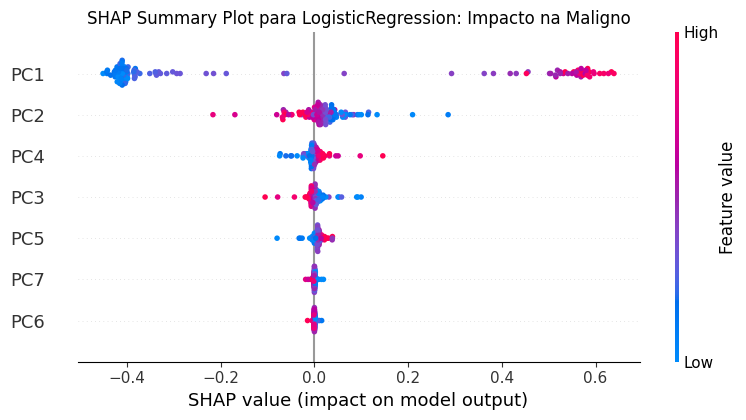


Exibindo o Gráfico de Dependência para a feature mais importante 'PC1' (Classe: Maligno)...


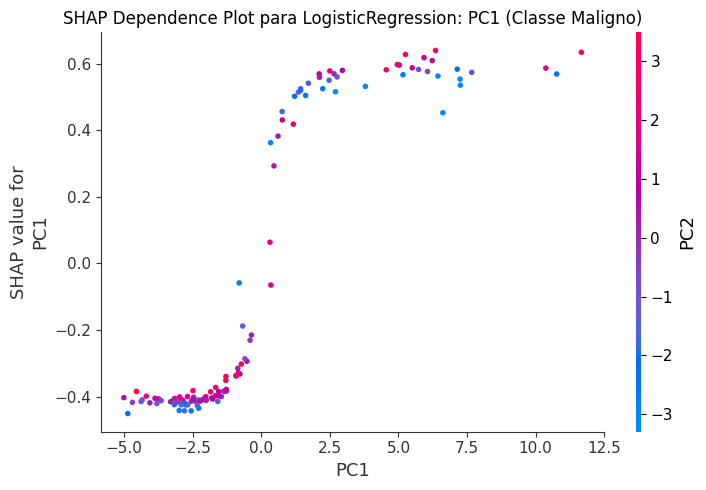


Exibindo o Gráfico de Força para a instância de teste 0 (Classe: Maligno)...


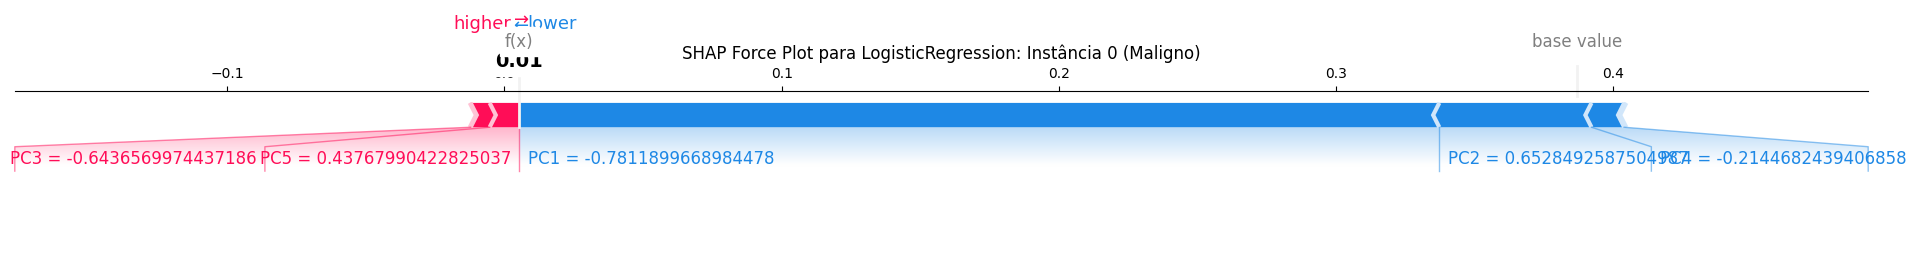


--- Análise SHAP Concluída para o Melhor Modelo. ---


In [75]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Assumimos que as seguintes variáveis já estão definidas e corretas: ---
# best_model_object (o modelo LogisticRegression treinado com dados PCA)
# best_model_name (o nome do modelo)
# X_train (DataFrame Pandas com as 7 componentes PCA para treino)
# X_test (DataFrame Pandas com as 7 componentes PCA para teste)
# ---

model_to_interpret = best_model_object
model_name_for_shap = best_model_name

print(f"\n--- Iniciando a interpretação SHAP para o modelo: {model_name_for_shap} ---")

# Para o SHAP, X_train_for_shap e X_test_for_shap já são os DataFrames com as 7 PCs
X_train_for_shap = X_train # Já é o DataFrame com PCs e nomes de colunas (PC1, PC2, etc.)
X_test_for_shap = X_test   # Já é o DataFrame com PCs e nomes de colunas (PC1, PC2, etc.)

# --- Definir a função que o SHAP usará, garantindo que o input seja um DataFrame com colunas corretas ---
def model_predict_proba_func(X_input_array):
    if isinstance(X_input_array, pd.DataFrame):
        X_df_to_predict = X_input_array
    else:
        X_df_to_predict = pd.DataFrame(X_input_array, columns=X_train_for_shap.columns)

    return model_to_interpret.predict_proba(X_df_to_predict)

# Cria um Explainer SHAP
X_train_sample = shap.sample(X_train_for_shap, 100) # Amostra de 100 instâncias (DataFrames PCA)
explainer = shap.KernelExplainer(model_predict_proba_func, X_train_sample) # Passa a função wrapper

# Calcula os Valores SHAP
print("\nCalculando os valores SHAP para o conjunto de teste (isso pode levar tempo)...")
shap_values = explainer.shap_values(X_test_for_shap)
print("Valores SHAP calculados.")

# --- Definição dos nomes das classes ---
# ATENÇÃO: Confirme se 0 é Benigno e 1 é Maligno no SEU dataset.
# Se for o contrário, inverta a ordem aqui: class_labels = ['Maligno', 'Benigno']
class_labels = ['Benigno', 'Maligno']

print("\nGerando gráficos SHAP para insights do modelo...")

# --- Novo Bloco: Agrupar gráficos por classe ---
# Itera sobre as classes, mostrando todos os gráficos de uma classe antes de passar para a próxima.
for i, class_name in enumerate(class_labels): # i=0 para Benigno, i=1 para Maligno

    print(f"\n############################################################")
    print(f"##             Análise SHAP para a Classe: {class_name}             ##")
    print(f"############################################################")

    # --- 4.1. Gráfico de Resumo (Summary Plot) para a Classe Atual ---
    print(f"\nExibindo o Gráfico de Resumo (Summary Plot) - Importância Global das Features para {class_name}...")
    shap.summary_plot(shap_values[:,:,i], X_test_for_shap, show=False)
    plt.title(f'SHAP Summary Plot para {model_name_for_shap}: Impacto na {class_name}')
    plt.tight_layout()
    plt.show()

    # --- 4.2. Gráfico de Dependência (Dependence Plot) para a Classe Atual ---
    # Calculamos a feature mais importante para CADA CLASSE SEPARADAMENTE
    mean_abs_shap_for_class = np.abs(shap_values[:,:,i]).mean(0)
    feature_importances_series_for_class = pd.Series(mean_abs_shap_for_class, index=X_test_for_shap.columns)
    most_important_feature_for_class = feature_importances_series_for_class.idxmax()

    print(f"\nExibindo o Gráfico de Dependência para a feature mais importante '{most_important_feature_for_class}' (Classe: {class_name})...")
    shap.dependence_plot(
        most_important_feature_for_class,
        shap_values[:,:,i], # Seleciona a fatia de SHAP values para a classe atual
        X_test_for_shap,
        feature_names=X_test_for_shap.columns.tolist(),
        show=False
    )
    plt.title(f'SHAP Dependence Plot para {model_name_for_shap}: {most_important_feature_for_class} (Classe {class_name})')
    plt.tight_layout()
    plt.show()

    # --- 4.3. Gráfico de Força (Force Plot) para uma Previsão Individual da Classe Atual ---
    # O force plot é uma explicação individual. Vamos mostrar para a mesma instância
    # mas focando em como as features a empurram para ser Benigno ou Maligno.
    instance_to_explain_index = 0 # Mantendo a mesma instância para comparação
    print(f"\nExibindo o Gráfico de Força para a instância de teste {instance_to_explain_index} (Classe: {class_name})...")
    shap.force_plot(
        explainer.expected_value[i], # Expected value para a classe atual
        shap_values[:,:,i][instance_to_explain_index,:], # SHAP values para a classe atual
        X_test_for_shap.iloc[instance_to_explain_index,:],
        feature_names=X_test_for_shap.columns.tolist(),
        matplotlib=True,
        show=False
    )
    plt.title(f'SHAP Force Plot para {model_name_for_shap}: Instância {instance_to_explain_index} ({class_name})')
    plt.tight_layout()
    plt.show()

    # Adicionando o decision_plot para a classe atual, se desejar
    # shap.decision_plot(explainer.expected_value[i], shap_values[:,:,i], X_test_for_shap.columns)
    # plt.title(f'SHAP Decision Plot para {model_name_for_shap}: Instância {instance_to_explain_index} ({class_name})')
    # plt.tight_layout()
    # plt.show()


print("\n--- Análise SHAP Concluída para o Melhor Modelo. ---")

Após análise de shape podemos ver que um PC1 alto pode influenciar consideravelmente o modelo para um diagnostico de Maligno e baixo para Benigno
PC1, PC2 e PC4 são as classes que mais influênciam nosso modelo.

Constatado que após as métricas de avaliação do modelo é correto afirmar que poderia auxiliar diagnosticos médicos pois sua métricas de desepenham ficaram entre 97%-98%, com uma precisão de 97% para benigno e 98% para Maligno

Model                 LogisticRegression
Test Accuracy                   0.973684
Test Precision                  0.973719
Test Recall                     0.973684
Test F1-score                   0.973621
CV Mean Accuracy                0.980686
Model_Object        LogisticRegression()
Name: 0, dtype: object

--- O Melhor Modelo Escolhido para Análise SHAP é: LogisticRegression ---
Com Test F1-score: 0.9736
E CV Mean Accuracy: 0.9807


Acurácia no teste: 0.9737
------------------------------------------------------------
Scores de Cross-validation (Acurácia com Pipeline): [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Acurácia média de Cross-validation (com Pipeline): 0.9807
------------------------------------------------------------

Classification Report (Conjunto de Teste):
              precision    recall  f1-score   support

     Benigno       0.97      0.99      0.98        71
     Maligno       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


In [76]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer # Assuming you've already used this

original_feature_names = X_padronizado.columns.tolist() # <-- Use X_padronizado here!
pc_loadings = pca.components_

loadings_df = pd.DataFrame(pc_loadings, columns=original_feature_names,
                           index=[f'PC{i+1}' for i in range(pca.n_components_)])

print("\n--- Weights (Loadings) of Original Features for Each Principal Component ---")
print(loadings_df)

print("\n--- Top 3 Most Influential Original Features for Each PC (by Magnitude) ---")
# Now, for each Principal Component, let's identify the original features with the largest absolute weights.
for index, row in loadings_df.iterrows():
    # Sort the weights by their absolute value (magnitude) to find the most impactful features.
    top_n = 3 # Number of top features to display for each PC
    feature_contributions = row.abs().sort_values(ascending=False)

    print(f"\n{index}:") # E.g., PC1, PC2
    print(f"  Most impactful original features (top {top_n} by magnitude):")
    for feature_name, abs_weight in feature_contributions.head(top_n).items():
        # Get the original weight (with its sign) to understand the direction of contribution.
        original_weight = row[feature_name]
        print(f"    - **{feature_name}**: {original_weight:.4f} (Magnitude: {abs_weight:.4f})")


--- Weights (Loadings) of Original Features for Each Principal Component ---
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
PC1     0.218902      0.103725        0.227537   0.220995         0.142590   
PC2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   
PC3    -0.008531      0.064550       -0.009314   0.028700        -0.104292   
PC4    -0.041409      0.603050       -0.041983  -0.053434        -0.159383   
PC5    -0.037786      0.049469       -0.037375  -0.010331         0.365089   
PC6     0.018741     -0.032179        0.017308  -0.001888        -0.286374   
PC7    -0.124088      0.011400       -0.114477  -0.051653        -0.140669   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
PC1          0.239285        0.258400             0.260854       0.138167   
PC2          0.151892        0.060165            -0.034768       0.190349   
PC3         -0.074092        0.002734            -0.025564      -0